# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m = 1
A = 0.001#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [2]:
res=m;
N=2.0^m*400.0/2.0
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [3]:
print(N)

400.0

In [4]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.0025
dt =0.0025
dx/dt =1.0


In [5]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [6]:
include("./ScalarField.jl");

In [7]:
ori=0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);

initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=round(dx,digits=10))

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

step size is  0.0025
the time step is 0.0025


# Initial data of m β Ψ and Ψ,x

In [8]:
using Dierckx

####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [9]:
"""integ=integrator(initX,derpsi_func)
plot(initX1, integ[4:L-3],xlim=[0,0.001])"""

"integ=integrator(initX,derpsi_func)\nplot(initX1, integ[4:L-3],xlim=[0,0.001])"

In [187]:
y0=[0 0 0]
state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:])

#state_array = ghost(state_array);

#state_array[4:L-3,3] = rk4wrapper(psiRHS,0,initX[4:L-3],0,derpsi_func,state_array[:,:])

#state_array[4:L-3,3] = integrator(initX,derpsi_func)[4:L-3]

psi_func = Spline1D(initX[4:L-3],state_array[4:L-3,3],k=4)
funcs = [psi_func derpsi_func]
        
y0=[0.0 0.0]
#state_array[4:L-3,1:2] = n_rk4wrapper(mbetaRHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);

1×2 Matrix{Float64}:
 0.0  0.0

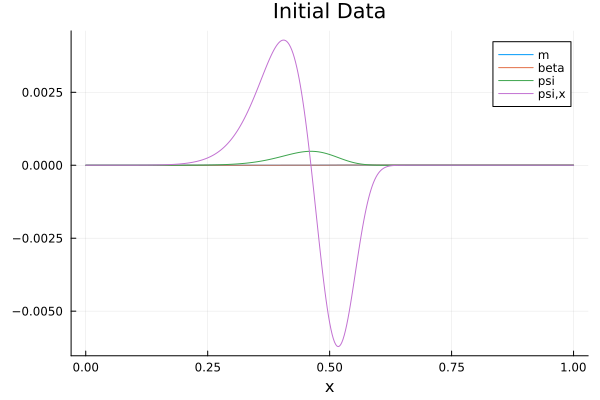

In [188]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [189]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

In [190]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [191]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


 ## Time evolution

fixed grid

In [192]:
finaltime=1.29#4#0.08*2#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

iteration 10 dt is 0.0025, time of iteration is 0.024999999999999998
iteration 20 dt is 0.0025, time of iteration is 0.05000000000000001
iteration 30 dt is 0.0025, time of iteration is 0.07500000000000002
iteration 40 dt is 0.0025, time of iteration is 0.10000000000000005
iteration 50 dt is 0.0025, time of iteration is 0.12500000000000006
iteration 60 dt is 0.0025, time of iteration is 0.15000000000000008
iteration 70 dt is 0.0025, time of iteration is 0.1750000000000001
iteration 80 dt is 0.0025, time of iteration is 0.20000000000000012
iteration 90 dt is 0.0025, time of iteration is 0.22500000000000014
iteration 100 dt is 0.0025, time of iteration is 0.25000000000000017
iteration 110 dt is 0.0025, time of iteration is 0.2750000000000002
iteration 120 dt is 0.0025, time of iteration is 0.3000000000000002
iteration 130 dt is 0.0025, time of iteration is 0.32500000000000023
iteration 140 dt is 0.0025, time of iteration is 0.35000000000000026
iteration 150 dt is 0.0025, time of iteration

In [136]:
println(dt)
println(dx)
println(epsilon(dt,dx))
println(epsilon(dt/2,dx))

#se monitor ratio > x, then dt->dt/, epsilon->epsilon*2

0.00125
0.00125
0.0078125
0.015625


In [166]:
println(dt)
println(dx)
println(epsilon(dt/2,dx))

0.0003125
0.0003125
0.015625


 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res3.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res3.gif")
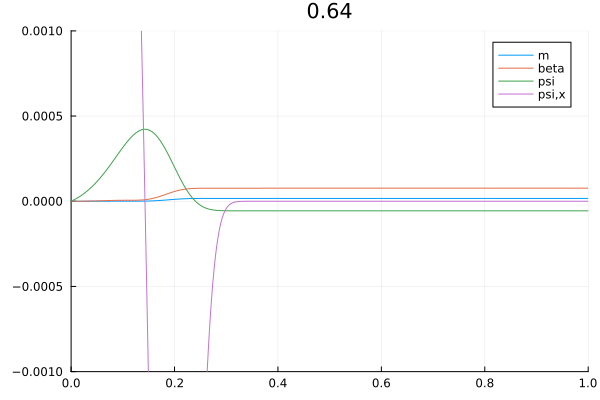

In [157]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1020:10:3200
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],title="$temp", ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1200)

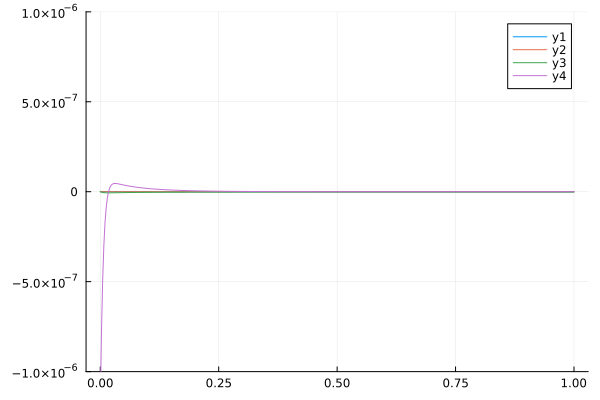

In [195]:
plot(initX1, [state_array[4:L-3,1:4]],ylim=[-0.000001, 0.000001])

In [78]:
epsilon(dt,dx)

0.07812500078125001

In [79]:
twod_epsilon(dt,dx)

0.31250000312500004

In [89]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:1000#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio10.csv" is not a valid file or doesn't exist

In [146]:
epsilon(dt,dx)

0.078125

In [147]:
twod_epsilon(dt,dx)

0.3125

In [37]:

auxinitX= range(0,1,step=dx)
println(Der(state_array,6,4,auxinitX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, auxinitX[6]))

3.017168193837207e-8
0.00017208804225226937


In [53]:
println(Der(state_array,60,4,initX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, initX[60]))

println(derivative(spl, initX[60]).-Der(state_array,60,4,initX))

0.014407887381376435
0.014407810796996974
-7.658437946138352e-8


In [30]:
using Roots
find_zero(derpsi_func, (0,0.5), Bisection())

0.2713799770174635

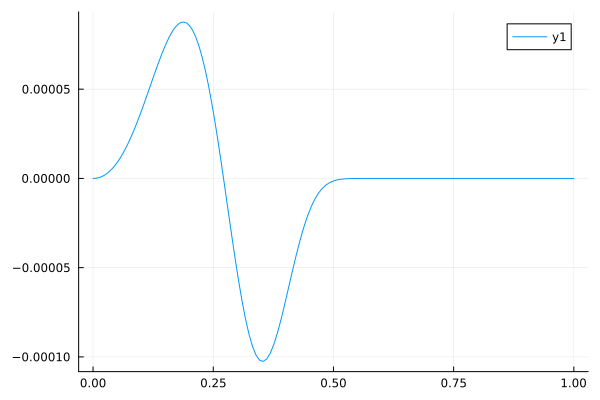

In [23]:
using Plots
plot(initX1, derpsi_func(initX1))

In [66]:
m_func = Spline1D(initX[4:L-3],state_array[4:L-3,1],k=4)
beta_func = Spline1D(initX[4:L-3],state_array[4:L-3,2],k=4)
der_funcs=[derivative(m_func,initX) derivative(beta_func,initX) derivative(derpsi_func,initX)]
der_funcs[2,1] # i is gridpoint, j is function

-1.5086563198078306e-16

In [58]:
derivative(m_func,initX)

207-element Vector{Float64}:
 -3.6298572062043756e-16
 -1.5086563198078306e-16
 -4.2846357130174216e-17
 -3.826449677788914e-18
  1.2955367671949918e-18
  7.621048595599677e-18
  5.1885306005563256e-17
  2.109734086495333e-16
  6.633715930192716e-16
  1.768094158067992e-15
  4.2032891114686175e-15
  9.186535719427543e-15
  1.882331476354324e-14
  ⋮
 -3.776355223175436e-19
 -1.7646519734465227e-20
  1.0587911840678348e-20
  2.2651714422785337e-19
 -1.4750589189488752e-19
 -3.7472920178666525e-19
  6.78866591885402e-20
 -2.96640705754548e-20
  5.421010862427541e-19
  3.1064380724396854e-18
  8.986602830812212e-18
  1.9505851304156383e-17

In [166]:
derivative(derpsi_func,initX1[1])

3.9599527939805415e-10

In [163]:
derivative(derpsi_func,initX1)[1]

3.9599527939805415e-10

In [161]:
derivative(derpsi_func,initX)[4]

3.9599527939805415e-10

In [ ]:
aux=doublegrid(initX1)

using Plots
plot(aux, derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, ylim=[0, 10^(-13)])

##

x2=aux
y2=derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A);

##

double_resolution=y2
basis_resolution=y1
xs = ( x1, x2 )
ys = ( basis_resolution, double_resolution*16*4 )
p = plot()
map(x->plot!(x[1],x[2],xaxis="x",title="Interpolation error", legend=false), zip(xs, ys))
display(p)
     